# Chapter 5: Plottin Chi-Square Distances

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

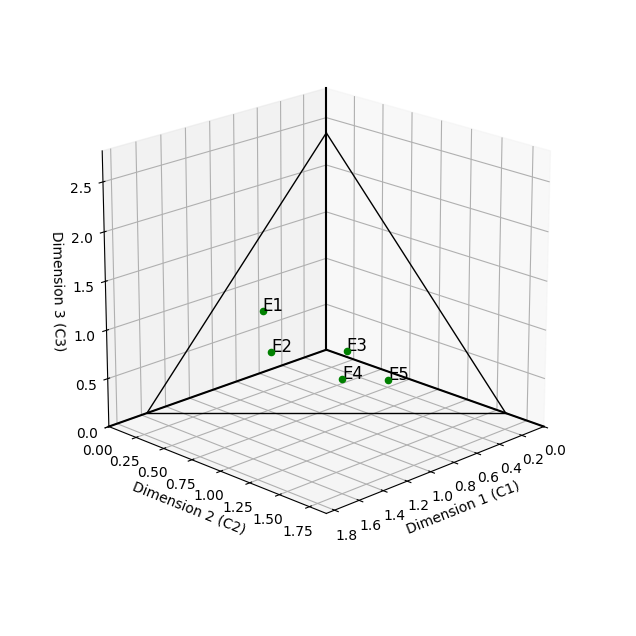

In [2]:
# Define the relative path to the Excel file
data_path = "../data/readers.xls"

# Load the data into a DataFrame
table = pd.read_excel(data_path, index_col=0)

# Step 1: Calculate row profiles (normalized rows)
table_pro = table.div(table.sum(axis=1), axis=0)

# Step 2: Calculate column masses
table_col_mass = table.sum(axis=0) / table.values.sum()

# Step 3: Calculate the weights for the columns
table_wt = np.sqrt(table_col_mass)

# Step 4: Create a figure and a 3D axis for the plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Step 5: Plot axes lines ensuring that the origin is at the back
ax.plot([0, 1.2 / table_wt.iloc[1]], [0, 0], [0, 0], color='black')  # X-axis
ax.plot([0, 0], [0, 1.2 / table_wt.iloc[2]], [0, 0], color='black')  # Y-axis
ax.plot([0, 0], [0, 0], [0, 1.2 / table_wt.iloc[0]], color='black')  # Z-axis

# Step 6: Plot the triangle
ax.plot([0, 0], [0, 1 / table_wt.iloc[2]], [1 / table_wt.iloc[0], 0], color='black', linewidth=1)
ax.plot([0, 1 / table_wt.iloc[1]], [1 / table_wt.iloc[2], 0], [0, 0], color='black', linewidth=1)
ax.plot([0, 1 / table_wt.iloc[1]], [0, 0], [1 / table_wt.iloc[0], 0], color='black', linewidth=1)

# Step 7: Calculate the chi-square standardized coordinates
table_chi = table_pro.div(table_wt, axis=1)

# Step 8: Plot points and add labels for each educational level
for i, label in enumerate(table.index):
    ax.scatter(
        table_chi.iloc[i, 1],
        table_chi.iloc[i, 2],
        table_chi.iloc[i, 0],
        s=20,
        color='green',
        )
    
    # Adjust the text position dynamically to avoid overlap
    # Apply a small random jitter to the label position
    offset_x = 0.05 + np.random.uniform(-0.02, 0.02)
    offset_y = 0.05 + np.random.uniform(-0.02, 0.02)
    offset_z = 0.05 + np.random.uniform(-0.02, 0.02)

    ax.text(
        table_chi.iloc[i, 1],
        table_chi.iloc[i, 2],
        table_chi.iloc[i, 0],
        label,
        fontsize=12,
        )

# Step 9: Set axis labels
ax.set_xlabel('Dimension 1 (C1)')
ax.set_ylabel('Dimension 2 (C2)')
ax.set_zlabel('Dimension 3 (C3)')

# Step 10: Set the plot limits
ax.set_xlim(0, 1.2 / table_wt.iloc[1])
ax.set_ylim(0, 1.2 / table_wt.iloc[2])
ax.set_zlim(0, 1.2 / table_wt.iloc[0])

# Adjust the aspect ratio of the plot
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.8, 0.8, 1, 1]))

# Step 11: Adjust the view angle to ensure the origin is at the back of the plot
ax.view_init(elev=20, azim=45)

# Step 12: Display the plot
plt.show()